### TP 4, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. <br>

## Derivadas, consigna:
Realizar una función def tiroVertical(t, y0,v0): que reciba un vector tiempo, la altura inicial, y la velocidad inicial, y devuelva un vector con las posiciones correspondientes. <br>
Realizar un programa que grafique la posición en función del tiempo para un proyectil en caída libre que sale disparado de una altura inicial de 10m, con una rapidez inicial de
18 m/s llamando a la función tiroVertical. <br>
Estime numéricamente el tiempo de vuelo (es decir, con los datos calculados sin utilizar ningún método particular). <br>
Estime la altura máxima alcanzada por el proyectil. Una vez realizada esta función de manera tradicional, utilice la función max.<br>
Calcule numéricamente la aceleración del móvil utilizando la misma derivada numérica que programó antes.

In [7]:
import numpy as np
#import pandas as pd
import math
import matplotlib.pyplot as plt

In [8]:
h=0.2
t = np.arange(0,6,h)
y0 = 10
v0 = 18

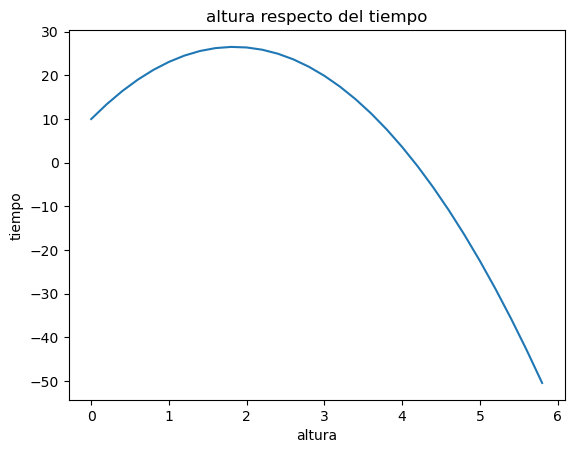

el tiempo total de vuelo es de 4.784580498866212s
la altura máxima con funcion es de 26.53061224489796 m
la altura máxima con numpy es de 26.523999999999994 m


In [9]:
def tiroVertical(t,y0,v0):
  g=-9.8
  y = y0+v0*t+(g/2)*t**2
  return y

#la altura respecto del tiempo

x=tiroVertical(t,y0,v0)
plt.xlabel('altura')
plt.ylabel('tiempo')
plt.plot(t,x)
plt.title('altura respecto del tiempo')
plt.show()

#el tiempo de vuelo 

def tiempoVuelo(v0,y0):
  g=-9.8
  tv1=2*(v0/abs(g))
  if abs(y0) >0: 
    tv2= (2*y0)/v0
  else:
    tv2=0
  tv = tv1+tv2
  return tv
print('el tiempo total de vuelo es de ' + str(tiempoVuelo(v0,y0)) +'s')

#la altura máxima

def alturaMax(v0,y0):
  g=-9.8
  h_max=y0 +(-v0**2)/(2*g)
  return h_max 
print('la altura máxima con funcion es de ' + str(alturaMax(v0,y0)) +' m')

h_max2=np.max(x)
print('la altura máxima con numpy es de ' + str(h_max2) +' m')

Como vimos, podemos resolver el trabajo con multiples datos con listas o con arrays de numpy. a continuación, dejo ambos métodos

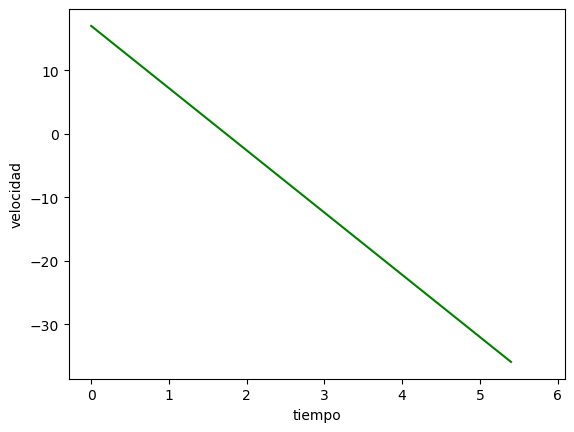

In [10]:
#si trabajo con arrays como si fueran listas 
def deriv(x,t):
  j= len(x) - 1
  i=0
  dx=np.zeros(len(x))
  h = t[i+1]-t[i] #t es equidistante, por lo tanto es lo mismo escribir como denominador  t[i+1]-t[i] que h. 
  for i  in range(0, len(x)-1):
    dx[i]= (x[i+1]-x[i])/(h)
  dx[i]=None
  return dx

plt.plot(t, deriv(x,t), color= 'green')
plt.xlabel('tiempo')
plt.ylabel('velocidad')
plt.show()

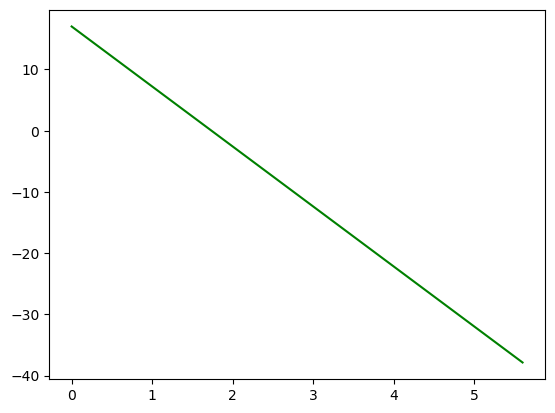

In [ ]:
#si trabajo con arrays con numpy
def deriv_2(x,t):
    h = t[1]-t[0] #t es equidistante, por lo tanto es lo mismo escribir como denominador  t[i+1]-t[i] que h. 
    x_f = np.roll(x,-1) #mover un índice hacia la izquierda todo el vector, ver apunte unidad 2
    x_f[-1] = None # último índice queda vacío
    dx = (x_f- x)/h
    return dx

plt.plot(t, deriv_2(x,t), color= 'green')

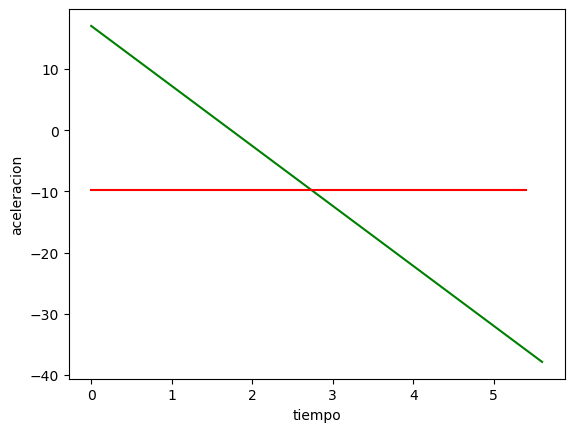

In [ ]:
#aceleraciòn
v = deriv_2(x,t)
a = deriv_2(v,t)
plt.plot(t, v,  color= 'green')
plt.plot(t, a,  color= 'red')
plt.xlabel('tiempo')
plt.ylabel('aceleracion')
plt.show()


In [ ]:
#quiero ver los datos 
df = pd.DataFrame({'altura':x,'tiempo':t, 'velocidad':deriv_2(x,t), 'aceleracion':deriv(deriv(x,t),t)})
display(df)

,altura,tiempo,velocidad,aceleracion
0,10.000,0.0,17.02,-9.8
1,13.404,0.2,15.06,-9.8
2,16.416,0.4,13.10,-9.8
3,19.036,0.6,11.14,-9.8
4,21.264,0.8,9.18,-9.8
5,23.100,1.0,7.22,-9.8
6,24.544,1.2,5.26,-9.8
7,25.596,1.4,3.30,-9.8
8,26.256,1.6,1.34,-9.8
9,26.524,1.8,-0.62,-9.8


### Otro ejercicio
Se mide el desplazamiento de un móvil en tiro vertical y se encuentra que responde a esta función matemática
$y=85.2-75.2e^{(\frac{-t}{2})}-19.6t$
Realizar una función que determine las posiciones en función del tiempo.<br>
Obtener la velocidad y la aceleración, y graficar en la misma ventana $y(t)$, $v(t)$ y $a(t)$ para este movimiento y para los valores calculados el programa que realizó en los puntos anteriores.<br>

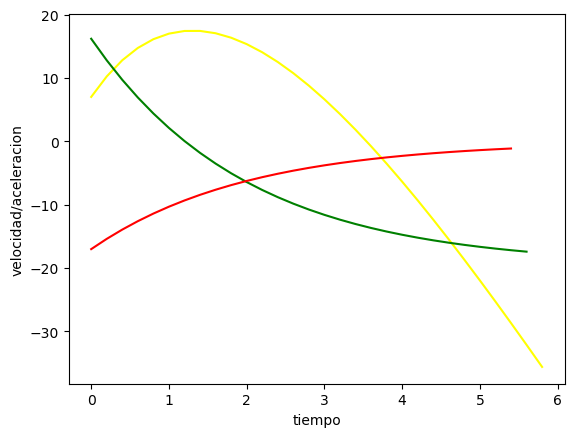

In [ ]:
def tiroVertical2(t):
  g=-9.8
  y=82.2 - 75.2 * math.e**(-t/2) - 19.6 *t
  return y

x2=tiroVertical2(t)
v2 = deriv_2(x2,t)
a2 = deriv_2(v2,t)
plt.plot(t, x2,  color= 'yellow')
plt.plot(t, v2,  color= 'green')
plt.plot(t, a2,  color= 'red')
plt.xlabel('tiempo')
plt.ylabel('velocidad/aceleracion')
plt.show()


###    Integrales
#### método de los rectángulos
Realice una función que resuelva integrales numéricas. Ejecutarla sobre la función v(t)
calculada en el primer ejercicio de manera que calcule  
$\int_{0}^{t_v} v(t) dt$
siendo el $t_v$ el tiempo de vuelo total. <br>
Esta integral representa la distancia de vuelo.

In [ ]:
x = np.arange(0,3,0.0001)
def f(x):
    return x**2 + 0.5*x

In [ ]:
#Primero la forma clásica, sin recurrir a numpy
def integral(x,y):
  i=0
  z=0
  while i < len(x)-1:
    z+= y[i+1]* (x[i+1] -x[i]) #donde y es la altura y delta x la base
    i=i+1
  return z 
print(integral(x,f(x)))

11.249475004999995


In [ ]:
#Con arrreglo numpy
def integral_2(x,y):
    x_f = np.roll(x,-1)
    x_f[len(x_f)-1] = x_f[len(x_f)-2] #ya que corrí el arreglo hacia la izquierda, le asigno el valor del anteúltimo índice para que no me rompa el cálculo
    z = f(x_f) * (x_f - x) #donde y es la altura y delta x la base
    return np.sum(z) 
print(integral_2(x,f(x)))

11.249475005000003


#### mètodo de trapecios

In [ ]:
def integral_t(x,y):
  i=0
  z=0
  while i < len(x)-1:
    z+= ((f(x[i+1])+ f(x[i]))) * (x[i+1] -x[i])/2 #donde y es la altura y delta x la base, se promedian los dos puntos para hacerlo mas preciso
    i=i+1
  return z 
print(integral_t(x,f(x)))

11.24895003749956


In [ ]:
def integral_t2(x,y):
    x_f = np.roll(x,-1)
    x_f[len(x_f)-1] = x_f[len(x_f)-2] #ya que corrí el arreglo hacia la izquierda, le asigno el valor del anteúltimo índice para que no me rompa el cálculo
    z = (f(x_f) + f(x)) * (x_f - x)/2 #donde y es la altura y delta x la base
    return np.sum(z) 
print(integral_t2(x,f(x)))

11.248950037499503
